In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('D:/Datasets/dataset/Data_train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [7]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [8]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [9]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [10]:
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [11]:
df.drop('Dep_Time',axis='columns',inplace=True)

In [12]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

In [13]:
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

In [14]:
df.drop('Arrival_Time',axis='columns',inplace=True)

In [15]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if (len(duration[i].split())!=2):
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        elif 'm' in duration[i]:
            duration[i]="0h "+duration[i].strip()

            
duration_hour=[]
duration_min=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split('h')[0]))
    duration_min.append(int(duration[i].split('m')[0].split()[-1]))

df['Duration_hour']=duration_hour
df['Duration_min']=duration_min

In [16]:
df["Duration_hours"] = duration_hour
df["Duration_mins"] = duration_min

In [17]:
df.drop('Duration',axis=1,inplace=True)

In [18]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

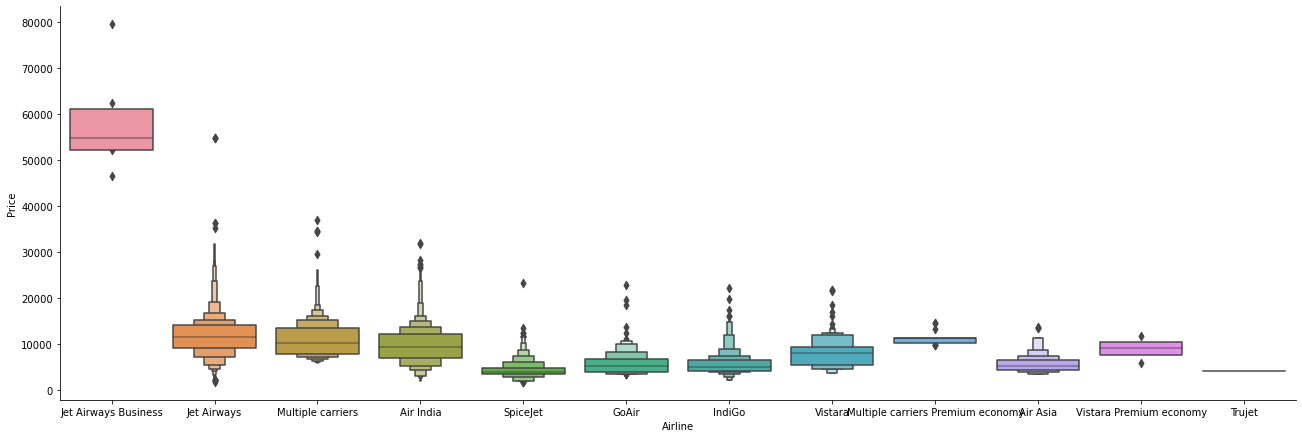

In [19]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

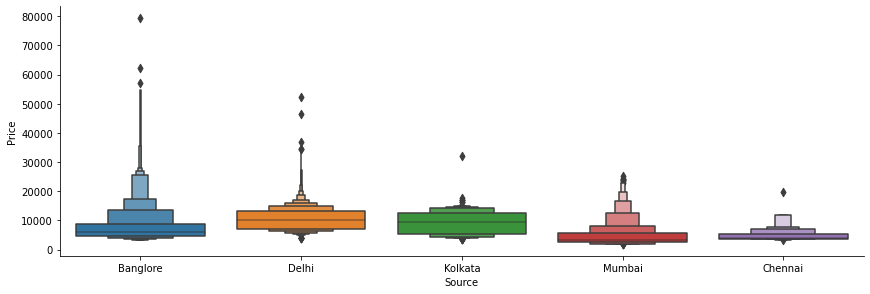

In [20]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


In [21]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [22]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [23]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [24]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40,2,40


In [33]:
df['Destination'].replace({'New Delhi':'Delhi'},inplace=True)

In [25]:
import statsmodels.formula.api as smf

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
cols=['Airline','Source','Destination']

In [ ]:
df[cols] = df[cols].apply(le.fit_transform)

In [ ]:
df

In [ ]:
y=df['Price']

In [ ]:
X=df.drop('Price',axis=1)

In [ ]:
X

In [ ]:
X.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [30]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
lm1 = smf.ols(formula='y~X',data=df).fit()

In [ ]:
lm1.params

In [ ]:
lm1.summary()

In [ ]:
X

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

In [ ]:
lm1 = smf.ols(formula='y~X', data=df).fit()

In [ ]:
lm1.params

In [ ]:
lm1.mse_resid

In [ ]:
lm1.mse_total

In [34]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,3,0
10681,Vistara,Banglore,Delhi,0,12648,1,3,11,30,14,10,2,40,2,40


In [35]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [36]:
y1=df['Price']

In [37]:
x=df.drop('Price',axis=1)

In [38]:
x.drop(['Duration_hours','Duration_mins'],axis=1,inplace=True)

In [39]:
x=pd.get_dummies(x,columns=['Airline','Source','Destination'])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)

In [41]:
x_train.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air Asia,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
10005,1,27,5,8,30,19,15,10,45,0,...,0,0,1,0,0,0,1,0,0,0
3684,1,9,5,11,30,12,35,25,5,0,...,0,0,1,0,0,0,1,0,0,0
1034,1,24,4,15,45,22,5,6,20,0,...,0,0,1,0,0,0,1,0,0,0
3909,1,21,3,12,50,1,35,12,45,0,...,0,0,1,0,0,0,1,0,0,0
3088,2,24,6,17,15,19,15,26,0,0,...,0,0,1,0,0,0,1,0,0,0


In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr=RandomForestRegressor(n_estimators=100)

In [44]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

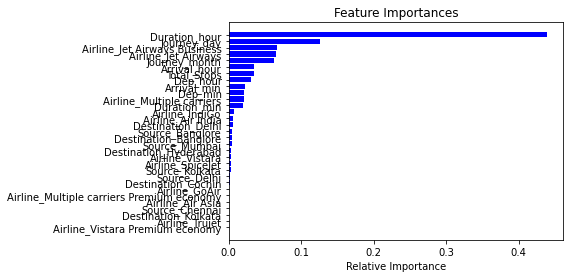

In [45]:
features=x.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [46]:
predictions=rfr.predict(x_test)

In [47]:
y_test

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8802      8824
8617     14151
Name: Price, Length: 2137, dtype: int64

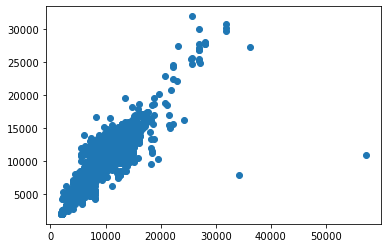

In [48]:
plt.scatter(y_test,predictions)

C:\Users\Abdul Samad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

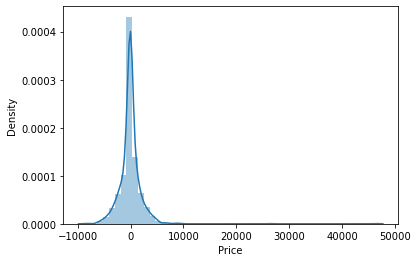

In [49]:
sns.distplot((y_test-predictions),bins=50)

In [50]:
from sklearn import metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', (metrics.r2_score(y_test, predictions)))

MAE: 1181.192267956151
MSE: 4449346.65246261
RMSE: 2109.3474470704464
r2_score: 0.7936492426523899


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [53]:
from sklearn.metrics import r2_score,make_scorer

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
regg=[LinearRegression(),RandomForestRegressor(),SVR(),DecisionTreeRegressor()]

In [56]:
mean=[]
std=[]
for i in regg:
    cvs=cross_val_score(i,x,y1,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))

In [57]:
for i in range(4):
    print(regg[i].__class__.__name__,':',mean[i])

LinearRegression : 0.60708366908563
RandomForestRegressor : 0.8128898134218698
SVR : 0.0036391723806763697
DecisionTreeRegressor : 0.7028046045158612


In [58]:
import shap

In [59]:
explainer = shap.TreeExplainer(rfr)

In [60]:
shap_values = explainer.shap_values(x_test)

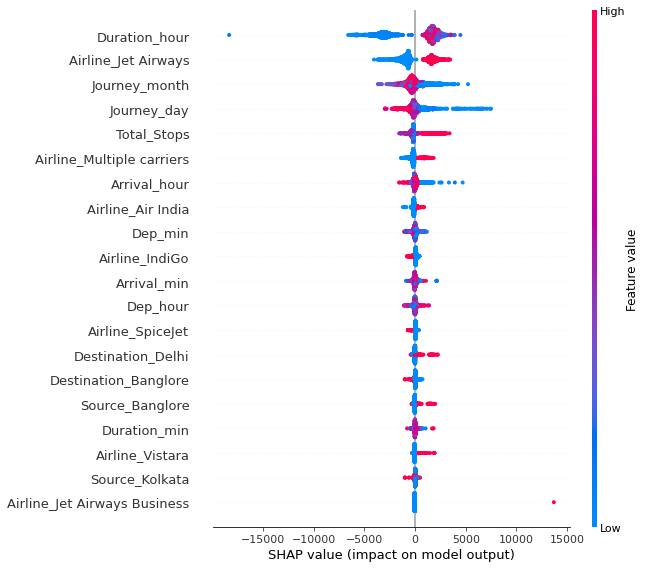

In [61]:
shap.summary_plot(shap_values, x_test)

In [62]:
shap_values_partition = explainer(x_train[:100])

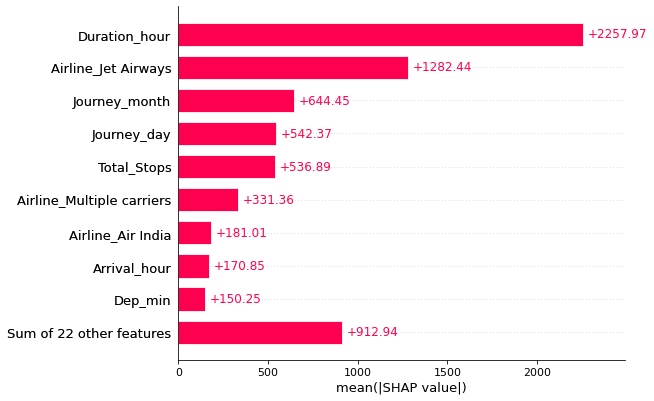

In [63]:
shap.plots.bar(shap_values_partition)

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [66]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [67]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [68]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [70]:
prediction = rf_random.predict(x_test)

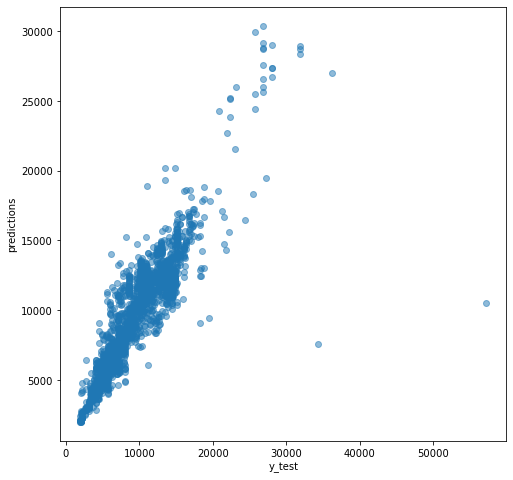

In [71]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Price', ylabel='Density'>

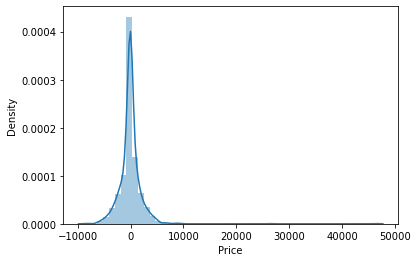

In [72]:
sns.distplot((y_test-predictions),bins=50)

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1162.152364872307
MSE: 4120600.7630889313
RMSE: 2029.9262949892864


In [74]:
import pickle

In [75]:
file = open('flight_price_pred.pkl', 'wb')

In [76]:
pickle.dump(rfr, file)

In [77]:
model = open('flight_price_pred.pkl','rb')
forest = pickle.load(model)